In [1]:
import pandas as pd
import os
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
ab_assignment = pd.read_csv('/content/ab_assignment.csv')
campaigns = pd.read_csv('/content/campaigns.csv')
chat_events = pd.read_csv('/content/chat_events.csv')
event_logs = pd.read_csv('/content/event_logs.csv')
payment_transactions = pd.read_csv('/content/payment_transactions.csv')
plan_history = pd.read_csv('/content/plan_history.csv')
push_events = pd.read_csv('/content/push_events.csv')
referral_events = pd.read_csv('/content/referral_event.csv')
users = pd.read_csv('/content/users.csv')

,payment_id,user_id,event_time,plan_name,amount,method,status
0,pay_d8b42511fe51,usr_182a54666833,2025-04-01 00:00:00,annual_basic,99.99,apple,success
1,pay_38bfe6505146,usr_48262cef2493,2025-04-01 00:00:00,monthly_basic,9.99,naver,success
2,pay_dfe9e467a1a5,usr_74ff4071a3e2,2025-04-01 00:00:00,annual_basic,99.99,naver,success
3,pay_55e6c5b83491,usr_385b38c519a3,2025-04-01 00:00:00,annual_basic,99.99,kakao,success
4,pay_592bc3d90809,usr_4dcde0d33183,2025-04-01 00:00:00,annual_pro,199.99,paypal,success
...,...,...,...,...,...,...,...
5662,pay_625274f0d7f2,usr_03d89ca4b544,2025-07-21 00:00:00,monthly_basic,9.99,apple,success
5663,pay_e749e34bb2f4,usr_b5aaa0a472e2,2025-07-21 00:00:00,annual_pro,199.99,card,success
5664,pay_af95c7bddf18,usr_1b12e00ddd1f,2025-07-21 00:00:00,monthly_pro,19.99,card,success
5665,pay_0c62c39745b7,usr_2cf9b0a3dc33,2025-07-21 00:00:00,annual_basic,99.99,kakao,success


,payment_id,user_id,event_time,plan_name,amount,method,status
0,pay_d8b42511fe51,usr_182a54666833,2025-04-01 00:00:00,annual_basic,99.99,apple,success
1,pay_38bfe6505146,usr_48262cef2493,2025-04-01 00:00:00,monthly_basic,9.99,naver,success
2,pay_dfe9e467a1a5,usr_74ff4071a3e2,2025-04-01 00:00:00,annual_basic,99.99,naver,success
3,pay_55e6c5b83491,usr_385b38c519a3,2025-04-01 00:00:00,annual_basic,99.99,kakao,success
4,pay_592bc3d90809,usr_4dcde0d33183,2025-04-01 00:00:00,annual_pro,199.99,paypal,success


,plan_name,count
0,annual_basic,1470
1,monthly_basic,1417
2,monthly_pro,1414
3,annual_pro,1366


<Axes: xlabel='plan_name'>

,payment_id,user_id,event_time,plan_name,amount,method,status
4,pay_592bc3d90809,usr_4dcde0d33183,2025-04-01 00:00:00,annual_pro,199.99,paypal,success
7,pay_d34baac3af88,usr_fa15b64da670,2025-04-01 00:00:00,annual_pro,199.99,card,success
8,pay_f996afb5cccc,usr_848b1932058e,2025-04-01 00:00:00,annual_pro,199.99,apple,success
10,pay_9557c9f4342b,usr_4b1ded8502e2,2025-04-01 00:00:00,annual_pro,199.99,naver,success
11,pay_4970bd8e8899,usr_97b30b602f8f,2025-04-01 00:00:00,monthly_pro,19.99,paypal,success
...,...,...,...,...,...,...,...
5656,pay_2366f4cdfcef,usr_6a60e06a7606,2025-07-21 00:00:00,annual_pro,199.99,card,success
5657,pay_91401895c5d1,usr_4cde0bfb37ae,2025-07-21 00:00:00,annual_pro,199.99,card,success
5658,pay_76c85509e654,usr_76af57912197,2025-07-21 00:00:00,annual_pro,199.99,card,success
5663,pay_e749e34bb2f4,usr_b5aaa0a472e2,2025-07-21 00:00:00,annual_pro,199.99,card,success


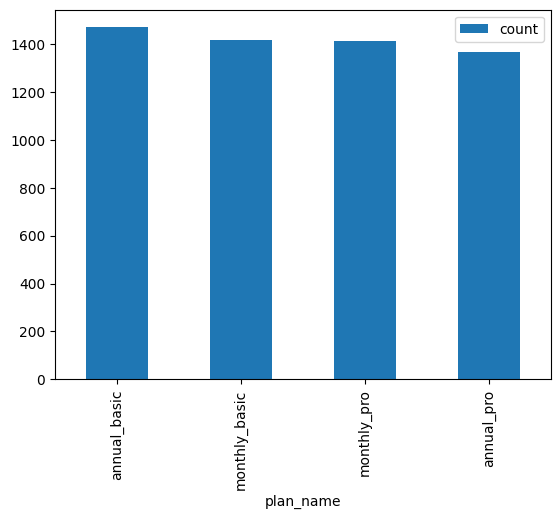

In [4]:
# 목적 : 활성화
# 결제 방식 분석

# 전체 결제건 확인
payment_transactions # 5667개
payment_transactions.head()

# 구독제별 인원수 확인
payment_transactions['plan_name'].value_counts().reset_index() # 4개 구독요금제 균등분포
payment_transactions['plan_name'].value_counts().reset_index().plot(kind='bar', x='plan_name')


filtered = payment_transactions.loc[payment_transactions['plan_name'].str.contains('pro'), :]
filtered



,method,count
0,paypal,998
1,card,961
2,naver,958
3,toss,956
4,apple,910
5,kakao,884


<Axes: xlabel='method'>

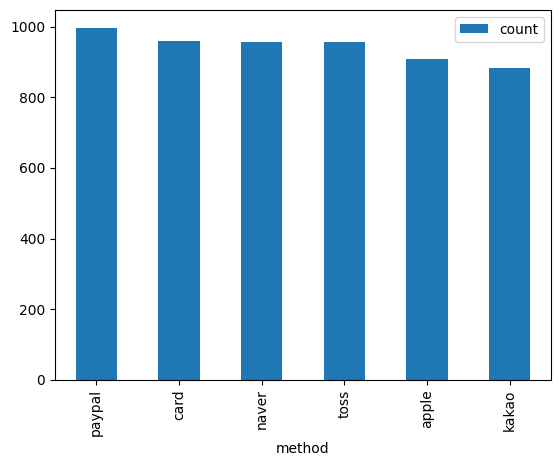

In [5]:
# 결제방식 확인
# 결제방식 6개 : paypal> card > naver > toss > apple > kakao 순, 균등

payment_transactions['method'].value_counts().reset_index()
payment_transactions['method'].value_counts().reset_index().plot(kind='bar', x='method')



In [6]:
# 결제요금별 확인 -> 구독요금제별 요금 매치
# 구독제별 수요(균등)
# annual basic > monthly basic > monthly pro > annual pro

payment_transactions.groupby(by = 'method')['amount'].value_counts()
payment_transactions['amount'].value_counts().reset_index()


# 결제수단별/결제요금별 균등함

method  amount
apple   9.99      232
        99.99     231
        19.99     225
        199.99    222
card    99.99     280
        9.99      233
        199.99    230
        19.99     218
kakao   19.99     237
        199.99    219
        99.99     217
        9.99      211
naver   99.99     275
        19.99     230
        9.99      228
        199.99    225
paypal  9.99      263
        19.99     258
        99.99     239
        199.99    238
toss    9.99      250
        19.99     246
        199.99    232
        99.99     228
Name: count, dtype: int64

,amount,count
0,99.99,1470
1,9.99,1417
2,19.99,1414
3,199.99,1366


In [7]:


# 결제실패율

payment_transactions['status'].value_counts() # 5667

,count
status,
success,5667


,0
payment_id,object
user_id,object
event_time,object
plan_name,object
amount,float64
method,object
status,object


dtype('<M8[ns]')

,count
event_time,
2025-04,603
2025-05,1365
2025-06,2011
2025-07,1688


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='event_time'>

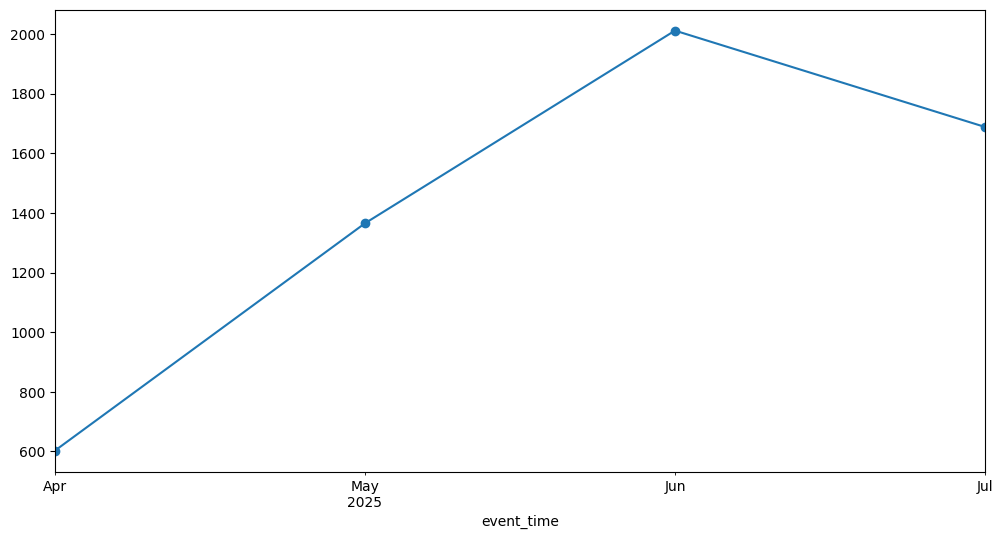

In [8]:
# 이벤트 시간 (일자별 추이)

payment_transactions.dtypes
payment_transactions['event_time']=pd.to_datetime(payment_transactions['event_time'])
payment_transactions['event_time'].dtypes


monthly_counts = payment_transactions['event_time'].dt.to_period('M').value_counts().sort_index()
monthly_counts

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o')

In [9]:
# Chat Event
# 전체 문의 2125, 회원수 대비 적음

chat=pd.read_csv('/content/chat_events.csv')
chat


,chat_id,user_id,sent_at,tag,emotion,channel,status
0,chat_d678903d6e,usr_d9957640e673,2025-04-01 12:39:32,Error,negative,web,open
1,chat_a4a7c3a003,usr_53edf6429808,2025-04-01 13:59:07,Other,negative,in_app,in_progress
2,chat_086533804d,usr_b3b6d07c5a6a,2025-04-01 10:48:29,Feature Suggestion,neutral,email,in_progress
3,chat_a52fea733c,usr_f14a5d9a25cc,2025-04-01 03:58:33,Other,neutral,in_app,in_progress
4,chat_f84a34f30f,usr_a933fb6930fa,2025-04-01 04:11:18,Learning,neutral,in_app,in_progress
...,...,...,...,...,...,...,...
2120,chat_b17550a1b9,usr_bfce4d4e23e8,2025-07-21 08:50:30,Account,neutral,web,open
2121,chat_f78e01a81a,usr_b3adc3eed263,2025-07-21 10:43:46,Other,neutral,web,open
2122,chat_19e2edbd54,usr_443fcd375ed0,2025-07-21 19:59:49,Payment,neutral,kakao,closed
2123,chat_95fc8273de,usr_5b095d08bc14,2025-07-21 03:35:32,Other,negative,kakao,open


In [12]:
# chat 문의유형 : Complaint(불만) > Account (계정) > Other > Payment(결제) > Feature Suggestion > Error > Learning > Praise
# 활성화지표 연결 : Complaint, Account, Payment, Feature Suggestion

chat['tag'].value_counts()

,count
tag,
Complaint,293
Account,293
Other,277
Payment,275
Feature Suggestion,261
Error,248
Learning,241
Praise,237


In [35]:
# 문의 상태순서 : open -> in_progess -> resolved or closed 예상
# 문의 상태 해결률 (resolved) : inapp > web > email > kakao (앱,웹 해결도 높다. 카카오 해결률 낮음)
# 문의 상태 미결률 (closed) : kakao > web > email > inapp  (카카오, 웹에서 미해결종료 많음. 카카오 문제있음)
# closed는 해결불가하거나 시스템상 자동종료, 사용자 철회 등 예상

completion_rate = chat.groupby('channel')['status'].apply(lambda x: (x == 'resolved').mean())
completion_rate

close_rate = chat.groupby('channel')['status'].apply(lambda x: (x == 'closed').mean())
close_rate


,status
channel,
email,0.244618
in_app,0.259117
kakao,0.236084
web,0.248252


,status
channel,
email,0.248532
in_app,0.222649
kakao,0.266795
web,0.255245


In [26]:
# 문의 채널별 문의수 : 대동소이함, web > app > kakao > email  (web, inapp 문의가 높다)


chat['channel'].value_counts()
chat.groupby('channel')['status'].value_counts()
result = chat.groupby('channel').agg({
    'status': ['count', lambda x: (x == 'resolved').mean()]
}).round(3)
result.columns = ['total_count', 'completion_rate']
result = result.sort_values('completion_rate', ascending=False)
result

,count
channel,
web,572
in_app,521
kakao,521
email,511


channel  status     
email    in_progress    134
         closed         127
         open           125
         resolved       125
in_app   in_progress    137
         resolved       135
         open           133
         closed         116
kakao    closed         139
         open           135
         in_progress    124
         resolved       123
web      open           149
         closed         146
         resolved       142
         in_progress    135
Name: count, dtype: int64

,total_count,completion_rate
channel,,
in_app,521,0.259
web,572,0.248
email,511,0.245
kakao,521,0.236


channel  status       emotion 
email    resolved     neutral     10
web      closed       positive     9
kakao    closed       neutral      9
web      open         negative     9
kakao    resolved     neutral      9
         in_progress  positive     9
in_app   in_progress  negative     8
email    closed       positive     8
kakao    open         negative     8
in_app   in_progress  positive     8
kakao    resolved     negative     8
email    open         negative     8
         in_progress  negative     7
web      open         neutral      7
         in_progress  positive     7
kakao    open         positive     7
in_app   open         negative     7
web      resolved     neutral      7
         closed       negative     7
         open         positive     6
         resolved     negative     6
         in_progress  neutral      6
kakao    closed       positive     6
                      negative     6
email    closed       negative     6
         in_progress  positive     6
                      neutral      6
in_app   open         neutral      5
web      resolved     positive     5
kakao    open         neutral      5
         in_progress  negative     5
email    open         neutral      5
in_app   resolved     neutral      5
                      positive     4
         closed       positive     4
         resolved     negative     4
email    resolved     negative     4
                      positive     4
in_app   closed       neutral      4
email    open         positive     3
web      in_progress  negative     3
kakao    in_progress  neutral      3
in_app   open         positive     3
email    closed       neutral      2
in_app   closed       negative     2
         in_progress  neutral      2
web      closed       neutral      2
kakao    resolved     positive     1
Name: count, dtype: int64

275


,channel,status,emotion,count
0,email,closed,negative,6
1,email,closed,neutral,2
2,email,closed,positive,8
3,email,in_progress,negative,7
4,email,in_progress,neutral,6
5,email,in_progress,positive,6
6,email,open,negative,8
7,email,open,neutral,5
8,email,open,positive,3
9,email,resolved,negative,4


/tmp/ipython-input-4208459746.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_flat, x='channel', y='count', hue='status', order=df_flat['channel'].unique(), ci = None)


<Axes: xlabel='channel', ylabel='count'>

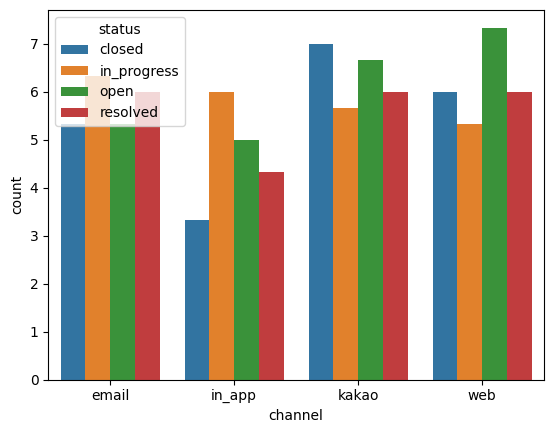

In [28]:
# 현근님 데이터
# 문의채널별 문의상태 파악
chat_events.loc[chat_events['tag'] == "Payment"][['channel', 'status', 'emotion' ]].value_counts()
print(chat_events.loc[chat_events['tag'] == "Payment"].groupby(by = 'channel')[['status', 'emotion']].value_counts().sum())

chat_events_df =  pd.DataFrame(chat_events.loc[chat_events['tag'] == "Payment"].groupby(by = 'channel')[['status', 'emotion']].value_counts()).sort_values(by = ['channel', 'status', 'emotion'], ascending=True)
df_flat = chat_events_df.reset_index()
df_flat

sns.barplot(data=df_flat, x='channel', y='count', hue='status', order=df_flat['channel'].unique(), ci = None)

In [43]:
# 문의반응별
# negative > netural > positive, negative 집중파악
# negative 채널 : web > kakao > email > inapp (웹, 카카오 불만 많이들어옴)
# 문의반응 negative는 open-> resolved 높음, neutral 은 미해결 높음.

chat['emotion'].value_counts()


chat.groupby('emotion')['channel'].value_counts()

chat.groupby('emotion')['status'].value_counts()

,count
emotion,
negative,732
neutral,702
positive,691


emotion   channel
negative  web        197
          kakao      189
          email      178
          in_app     168
neutral   in_app     187
          web        174
          email      173
          kakao      168
positive  web        201
          in_app     166
          kakao      164
          email      160
Name: count, dtype: int64

emotion   status     
negative  open           201
          resolved       180
          in_progress    179
          closed         172
neutral   closed         183
          open           178
          resolved       177
          in_progress    164
positive  in_progress    187
          closed         173
          resolved       168
          open           163
Name: count, dtype: int64

In [46]:
campaigns=pd.read_csv('/content/campaigns.csv')
campaigns

,campaign_id,name,utm_source,utm_campaign
0,cmp_001,Spring Promo,facebook,spring24
1,cmp_002,Referral,referral,ref_buddy
2,cmp_003,Google CPC,google,sem24


In [72]:
# push event 파악
# push 알림 시기 : 6 > 7 > 5월 순으로 높음
# push 알림 시기&타입 : 6월 reminder > promotion , 7월 system > promotion
# reminder의 효과가 좋다?

push_events=pd.read_csv('/content/push_events.csv')
push_events.dtypes # 데이터 형변환 필요
push_events

push_events['sent_at']=pd.to_datetime(push_events['sent_at'])
push_events.dtypes

push_event_time=push_events['sent_at'].dt.to_period('M').value_counts().sort_index()
push_event_time


# 시기별 푸쉬타입
monthly_type_counts = push_events.groupby(
    push_events['sent_at'].dt.to_period('M')
)['push_type'].value_counts()

monthly_type_ratio = push_events.groupby(
    push_events['sent_at'].dt.to_period('M')
)['push_type'].value_counts(normalize=True).unstack(fill_value=0)
monthly_type_ratio

,0
push_id,object
user_id,object
sent_at,object
opened,bool
push_type,object


,push_id,user_id,sent_at,opened,push_type
0,push_c0fa6339,usr_d2d410ce462c,2025-04-01 19:49:34,True,promotion
1,push_c596b41f,usr_1e61c54ffe43,2025-04-01 21:37:44,False,reminder
2,push_cc6496a2,usr_bc37c1c9df4a,2025-04-01 04:00:29,False,reminder
3,push_a32df886,usr_eaf94e026f0e,2025-04-01 11:16:08,False,reminder
4,push_6186b3a8,usr_e18d3381a0a4,2025-04-01 16:42:10,True,system
...,...,...,...,...,...
5331,push_e8061ad8,usr_b05bbb39d99d,2025-07-21 07:14:35,False,reminder
5332,push_0ce306ad,usr_0bb420700428,2025-07-21 21:32:17,False,reminder
5333,push_d29de7a0,usr_903bb8d477ea,2025-07-21 20:14:40,True,reminder
5334,push_9d240f47,usr_29222b81c9e2,2025-07-21 21:58:54,True,system


,0
push_id,object
user_id,object
sent_at,datetime64[ns]
opened,bool
push_type,object


,count
sent_at,
2025-04,599
2025-05,1358
2025-06,1805
2025-07,1574


push_type,promotion,reminder,system
sent_at,,,
2025-04,0.318865,0.322204,0.358932
2025-05,0.310015,0.340943,0.349043
2025-06,0.324100,0.354017,0.321884
2025-07,0.337992,0.322745,0.339263


In [77]:
ab=pd.read_csv('/content/ab_assignment.csv')
ab

ab['experiment_name'].value_counts()

,assignment_id,user_id,experiment_id,experiment_name,variant,assigned_at
0,ab_c87e6ef83a01,usr_fe5b5c4844cb,exp_202501,pricing_ab,A,2025-05-01 04:30:48
1,ab_43ea9eae6ffd,usr_081b7e4e7569,exp_202501,pricing_ab,A,2025-05-01 03:50:23
2,ab_c1b1dcfe7e39,usr_6d79daab8e89,exp_202501,pricing_ab,B,2025-05-01 23:09:59
3,ab_64433e3f7806,usr_582bbacbd485,exp_202501,pricing_ab,B,2025-05-01 23:08:32
4,ab_d1235d742468,usr_f69b37b87079,exp_202501,pricing_ab,A,2025-05-01 22:55:36
...,...,...,...,...,...,...
1412,ab_0cc93a223242,usr_9619dad3a150,exp_202503,checkout_design,redesign,2025-07-21 03:26:17
1413,ab_39109e640637,usr_7f238df0fde2,exp_202503,checkout_design,redesign,2025-07-21 00:17:00
1414,ab_4a45a5f6b2e6,usr_75b412488b44,exp_202503,checkout_design,redesign,2025-07-21 23:01:15
1415,ab_9ac65ea25fca,usr_49c3e69168e0,exp_202503,checkout_design,redesign,2025-07-21 18:46:06


,count
experiment_name,
pricing_ab,879
onboarding_cta,407
checkout_design,131
